<a href="https://colab.research.google.com/github/osirisdatascience/imdb-machine-learning-prediction/blob/main/ProjetoIndiciumLightHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [64]:
df = pd.read_csv('desafio_indicium_imdb.csv')

In [87]:
[i for i in df['Genre'].unique() if "," not in i]

['Drama', 'Western', 'Comedy', 'Horror']

In [ ]:
print(list(set(str(list(df['Genre'].unique())).replace('[','').replace(']','').replace(' ','').split(','))))

Primeiro passo, conhecer os dados



In [72]:
df.head(30)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
5,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
6,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
7,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
8,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0
9,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0


In [71]:
df = df.drop(df.columns[0], axis=1)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 996
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     713 non-null    int64  
 1   Series_Title   713 non-null    object 
 2   Released_Year  713 non-null    object 
 3   Certificate    713 non-null    object 
 4   Runtime        713 non-null    object 
 5   Genre          713 non-null    object 
 6   IMDB_Rating    713 non-null    float64
 7   Overview       713 non-null    object 
 8   Meta_score     713 non-null    float64
 9   Director       713 non-null    object 
 10  Star1          713 non-null    object 
 11  Star2          713 non-null    object 
 12  Star3          713 non-null    object 
 13  Star4          713 non-null    object 
 14  No_of_Votes    713 non-null    int64  
 15  Gross          713 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 94.7+ KB


Segundo passo: Tratar o que precisa


In [67]:
#  tudo girando em torno de analises de faturamento e de meta_score, preenchê-los com algum valor, pode ser arriscado e gerar inconsistência nos dados, não são colunas com valores facilmente previsíveis, que possam ser preenchidos com médi aou mediana
#  mas com um algoritmo de regressao linear , pode-se estimar um valor para trabalhar em cima futuramente
df.dropna(inplace=True)

In [69]:
df['Gross'] = df['Gross'].str.replace(',', '')  # Remove as vírgulas
df['Gross'] = df['Gross'].astype(float)
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


### PRIMEIRA PERGUNTA:

 # - Qual filme você recomendaria para uma pessoa que você não conhece?



In [78]:
# Minha estratégia é seguir 3 regras
# Regra 1 - Quantidade de votos desse filme tem que estar próximo a mediana, por dar indícios de uma quantidade recorrente de votos, sendo comum
# Regra 2 - Nota IMDB acima da média, dos filmes que tenham nmero de votos proximo a mediana
# Regra 3 - Faturamento acima da média, dos filmes que tenham nota acima da media e que tenham quantidade de votos prox da mediana
# Regra 4 - Meta_score acima da media, dos filmes que tenham faturamento acima da media, tenham nota acima da media e que tenham quantidade de votos prox da mediana
#  e por fim, obter o filme com maior soma de Meta_score e IMDB_Rating


# regra 1
df_votos_proximo_mediana = df[(df['No_of_Votes'] > df['No_of_Votes'].quantile(0.25)) & (df['No_of_Votes'] < df['No_of_Votes'].quantile(0.75))]

# regra 2
df_nota_media = df_votos_proximo_mediana[df_votos_proximo_mediana['IMDB_Rating'] > df_votos_proximo_mediana['IMDB_Rating'].mean()]

# regra 3
df_faturamento_acima_media = df_nota_media[df_nota_media['Gross'] > df_nota_media['Gross'].mean()]

# regra 4
df_filmes_recomendados = df_faturamento_acima_media[df_faturamento_acima_media['Meta_score'] > df_faturamento_acima_media['Meta_score'].mean()]

# obtendo a soma de Meta_score e IMDB_Rating de todos os selecionados com as regras acima
df_filmes_recomendados['Total_Score'] = df_filmes_recomendados['Meta_score'] + df_filmes_recomendados['IMDB_Rating']

# Identificando o filme com o 'Total_Score' mais alto
idx_max_score = df_filmes_recomendados['Total_Score'].idxmax()

# Selecionando o filme com a soma mais alta de 'Meta_score' e 'IMDB_Rating'
filme_recomendado = df_filmes_recomendados.loc[idx_max_score]['Series_Title']

print(f'Minha recomendação para uma pessoa que eu não conheço seria {filme_recomendado}')

Minha recomendação para uma pessoa que eu não conheço seria Lawrence of Arabia


<ipython-input-78-70c2cf887239>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filmes_recomendados['Total_Score'] = df_filmes_recomendados['Meta_score'] + df_filmes_recomendados['IMDB_Rating']


### SEGUNDA PERGUNTA:

# Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Correlação de 'Gross' com outras variáveis:
Gross          1.000000
No_of_Votes    0.560955
IMDB_Rating    0.130857
Meta_score    -0.014663
Name: Gross, dtype: float64


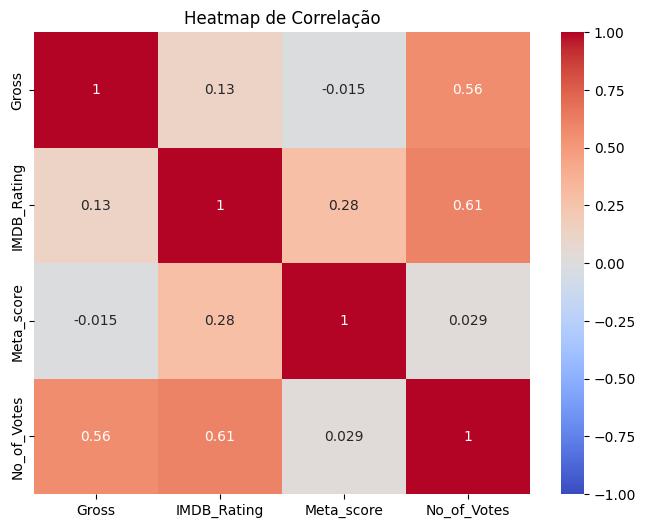

In [77]:
correlacoes = df[['Gross', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']].corr()
print("Correlação do Faturamento com outras variáveis:")
print(correlacoes['Gross'].sort_values(ascending=False))

# Visualização da correlação em um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Correlação')
plt.show()
#

In [110]:
generos = list(set(str(list(df['Genre'].unique())).replace('[','').replace(']','').replace(' ','').split(',')))

generos_resumidos = [i for i in df['Genre'].unique() if "," not in i]

In [111]:
#  FGiz um trabalho para resumir os generos, como tinham varios, eu peguei os que mais se repetiam e os que apareciam sozinhos, sem virgula

# Filtrando o df
filtered_df = df[df['Genre'].str.contains('|'.join(generos_resumidos))]


def get_summary_genre(genre):
    for g in genres_to_include:
        if g in genre:
            return g
    return genre  # Se nenhum dos gêneros desejados estiver presente, retorna o gênero original

# Adicionando a coluna 'Summary_Genre'
filtered_df['Summary_Genre'] = filtered_df['Genre'].apply(lambda x: get_summary_genre(x))

<ipython-input-111-ad3fe9f69d68>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Summary_Genre'] = filtered_df['Genre'].apply(lambda x: get_summary_genre(x))


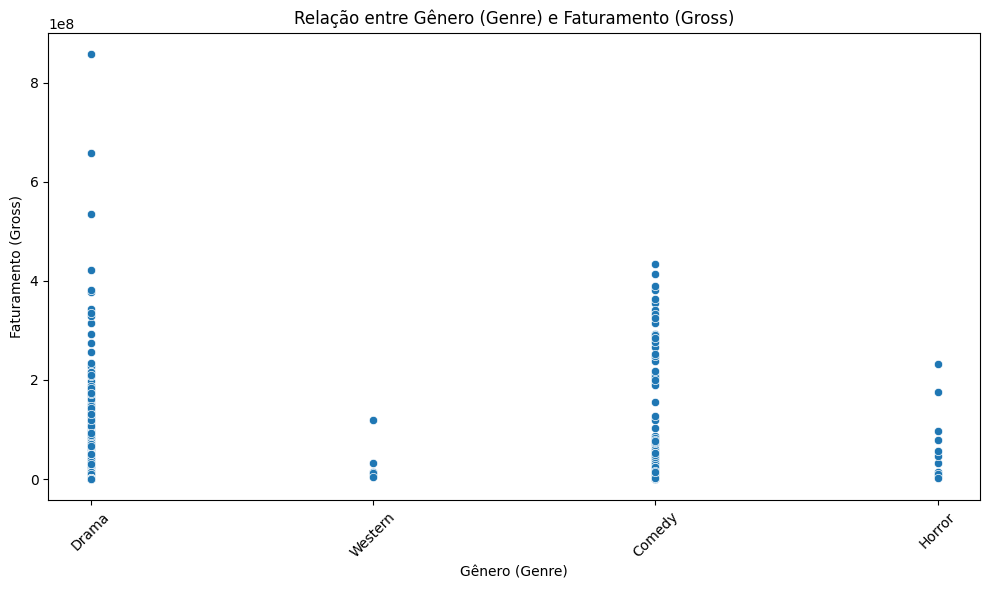

In [112]:
#  dessa forma, o genero pode influenciar no faturamento sim, Drama e Comedia se mantendo no topo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Summary_Genre', y='Gross', data=filtered_df)
plt.title('Relação entre Gênero (Genre) e Faturamento (Gross)')
plt.xlabel('Gênero (Genre)')
plt.ylabel('Faturamento (Gross)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### TERCEIRA PERGUNTA:

# Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?



In [106]:
genres_to_include = ['Drama', 'Western', 'Comedy', 'Horror']

# Filtrando o df
filtered_df = df[df['Genre'].str.contains('|'.join(genres_to_include))]


def obter_genero_resumido(genre):
    for g in genres_to_include:
          return g if g in genre else None

# Adicionando a coluna 'Summary_Genre'
filtered_df['Summary_Genre'] = filtered_df['Genre'].apply(lambda x: obter_genero_resumido(x))

filtered_df_selected = filtered_df[['Overview', 'Summary_Genre']]
filtered_df_selected



<ipython-input-106-ff96e3ca8411>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Summary_Genre'] = filtered_df['Genre'].apply(lambda x: get_summary_genre(x))


,Overview,Summary_Genre
0,An organized crime dynasty's aging patriarch t...,Drama
1,When the menace known as the Joker wreaks havo...,Drama
2,The early life and career of Vito Corleone in ...,Drama
3,A jury holdout attempts to prevent a miscarria...,Drama
4,Gandalf and Aragorn lead the World of Men agai...,Drama
...,...,...
988,Private investigator Philip Marlowe helps a fr...,Drama
989,A low-life bandit and an I.R.A. explosives exp...,Drama
990,A group of U.S. soldiers sneaks across enemy l...,Comedy
993,"Over two ""typical"" days in the life of The Bea...",Comedy


MODELO DE PREVISÃO DE NOTA IMDB

In [121]:
# filme pra prever
filme = {
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Converter Gross para float
filme['Gross'] = float(filme['Gross'].replace(',', ''))

# Criar DataFrame para o filme
filme_df = pd.DataFrame(filme, index=[0])

# df de treino
X = df[['Meta_score', 'No_of_Votes', 'Gross']]
y = df['IMDB_Rating']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# fazer previsões para o conjunto todo de teste
y_pred = model.predict(X_test)

# prever a nota do IMDb para o filme
predicted_imdb_rating = model.predict(filme_df)

print(f'A nota prevista do IMDb para o filme é: {predicted_imdb_rating[0]}')

# mse = mean_squared_error(y_test, y_pred)
# mse

A nota prevista do IMDb para o filme é: 9.255301013817594


In [125]:
!pip install joblib


In [130]:
# salvando o modelo , em forma de arquivo
model_filename = 'modelo_imdb_rating.pkl'
dump(model, model_filename)

['modelo_imdb_rating.pkl']

In [131]:
#  pra usar o modelo, rodar:
#  passar caminho do arquivo

loaded_model = load('modelo_imdb.pkl')